### Hourly Energy Consumption
Over 10 years of hourly energy consumption data from PJM in Megawatts

Dataset link: https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption

#### About Dataset: 
PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.

The hourly power consumption data comes from PJM's website and are in megawatts (MW).

The regions have changed over the years so data may only appear for certain dates per region.

##### import library ----

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import datetime
%matplotlib inline

##### read the data set ---

In [3]:
df = pd.read_csv("AEP_hourly.csv")
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


##### dataset information ----

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [5]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


#### seperate date and time ----

In [6]:
df["New_Date"] = pd.to_datetime(df["Datetime"]).dt.date
df["New_Time"] = pd.to_datetime(df["Datetime"]).dt.time

In [7]:
df1=df
df1.head()

,Datetime,AEP_MW,New_Date,New_Time
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00
2,2004-12-31 03:00:00,12577.0,2004-12-31,03:00:00
3,2004-12-31 04:00:00,12517.0,2004-12-31,04:00:00
4,2004-12-31 05:00:00,12670.0,2004-12-31,05:00:00


#### Maximum energy consumption of the year ---

In [8]:

df1[df1["AEP_MW"] == df["AEP_MW"].max()]

,Datetime,AEP_MW,New_Date,New_Time
30221,2008-10-20 14:00:00,25695.0,2008-10-20,14:00:00


#### Minimum energy consumption of the year ---

In [9]:
df1[df1["AEP_MW"] == df["AEP_MW"].min()]

,Datetime,AEP_MW,New_Date,New_Time
100759,2016-10-02 05:00:00,9581.0,2016-10-02,05:00:00


##### Conclusion : We can say that Maximum Energy was Consumed during 2016-10-02 at 05:00:00 and it was 9581.0 MW and Minimum was on 2008-10-20 at 14:00:00 and was 25695.0 MW

### Plot and Data visualization

C:\Users\Shahina Islam Tripty\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AEP_MW', ylabel='Density'>

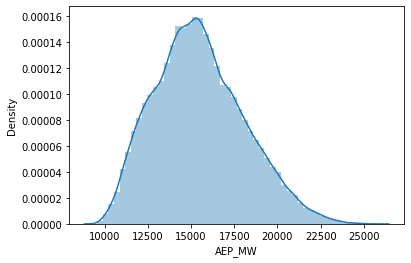

In [10]:
sns.distplot(df1["AEP_MW"])

### Extract Date and Time

In [11]:
df1.head(2)

,Datetime,AEP_MW,New_Date,New_Time
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00


In [12]:
df1["Year"] = pd.DatetimeIndex(df['New_Date']).year

In [13]:
df1.head()

,Datetime,AEP_MW,New_Date,New_Time,Year
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00,2004
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00,2004
2,2004-12-31 03:00:00,12577.0,2004-12-31,03:00:00,2004
3,2004-12-31 04:00:00,12517.0,2004-12-31,04:00:00,2004
4,2004-12-31 05:00:00,12670.0,2004-12-31,05:00:00,2004


#### Check how many Years are Unique

In [15]:
df1["Year"].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018], dtype=int64)

In [16]:
df1[df1["Year"] == 2013].nunique()

Datetime    8758
AEP_MW      5601
New_Date     365
New_Time      24
Year           1
dtype: int64

#### shows the Relationship of Energy vs Year

<AxesSubplot:xlabel='Year', ylabel='AEP_MW'>

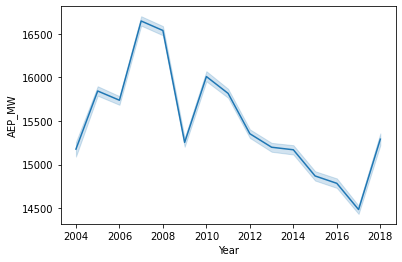

In [14]:
sns.lineplot(x=df1["Year"],y=df1["AEP_MW"], data=df1)

### Regression

Two main functions in seaborn are used to visualize a linear relationship as determined through regression.

<AxesSubplot:xlabel='Year', ylabel='AEP_MW'>

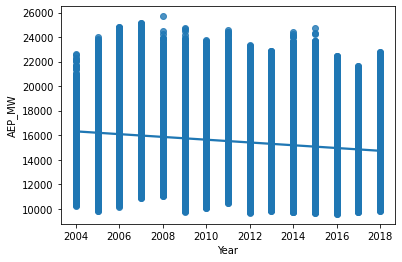

In [16]:
sns.regplot(x="Year", y="AEP_MW", data=df1)

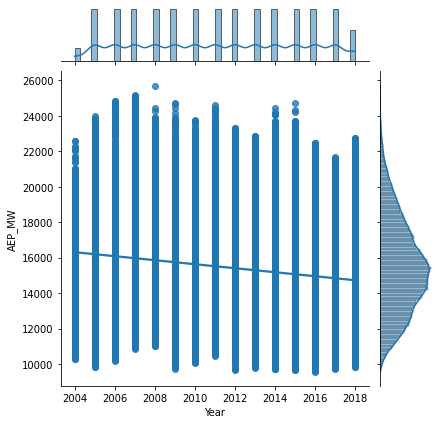

In [18]:
sns.jointplot(x=df1["Year"],
              y=df1["AEP_MW"],
              data=df1,
             kind="reg")

# continue.. 